Importing the required Library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Importing and Reading the data

Import dataset: gdp_1960_2020.csv file

In [3]:
df = pd.read_csv('gdp_1960_2020.csv')

Lets take a look at the data set

In [4]:
df.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


# Data Exploration

Let's first have a descriptive exploration on our data.

In [5]:
# summarize the data
df.describe()

,year,rank,gdp,gdp_percent
count,10134.000000,10134.000000,1.013400e+04,1.013400e+04
mean,1993.579238,87.353069,1.773584e+11,6.019341e-03
std,16.841720,53.688994,9.522888e+11,2.748022e-02
min,1960.000000,1.000000,8.824447e+06,3.550683e-07
25%,1980.000000,42.000000,1.380725e+09,8.875239e-05
50%,1995.000000,84.000000,7.559957e+09,3.650213e-04
75%,2008.000000,128.000000,4.995662e+10,2.499742e-03
max,2020.000000,206.000000,2.143322e+13,4.684827e-01


In [6]:
#size of the data ie. number of rows and columns
df.shape

(10134, 6)

The data has 10,134 rows and 6 columns as from the results above

### Narrow down to only show data of the Country Kenya and we will refer that to as Kenya_gdp_data

In [7]:
Kenya_gdp_data=df[df['country']=='Kenya']

Columns view of dataset to know what columns are nessesary for this analysis and remove the rest in the next step

In [8]:
df.columns

Index(['year', 'rank', 'country', 'state', 'gdp', 'gdp_percent'], dtype='object')

In [9]:
Kenya_gdp_data

,year,rank,country,state,gdp,gdp_percent
54,1960,55,Kenya,Africa,791265458,0.000682
157,1961,55,Kenya,Africa,792959472,0.000657
260,1962,55,Kenya,Africa,868111400,0.000657
366,1963,56,Kenya,Africa,926589348,0.000652
471,1964,56,Kenya,Africa,998759333,0.000641
...,...,...,...,...,...,...
9216,2016,70,Kenya,Africa,69188755364,0.000919
9420,2017,69,Kenya,Africa,78965004656,0.000985
9621,2018,66,Kenya,Africa,87778582964,0.001030
9824,2019,65,Kenya,Africa,95503088538,0.001107


In [10]:
Kenya_gdp_data.drop(['rank','state','gdp_percent'], axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9288\2408759043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kenya_gdp_data.drop(['rank','state','gdp_percent'], axis = 1, inplace = True)


In [11]:
Kenya_gdp_data

,year,country,gdp
54,1960,Kenya,791265458
157,1961,Kenya,792959472
260,1962,Kenya,868111400
366,1963,Kenya,926589348
471,1964,Kenya,998759333
...,...,...,...
9216,2016,Kenya,69188755364
9420,2017,Kenya,78965004656
9621,2018,Kenya,87778582964
9824,2019,Kenya,95503088538


## Let's select some features to explore more.

In [12]:
cdf = Kenya_gdp_data[['year','gdp']]
cdf.head()

,year,gdp
54,1960,791265458
157,1961,792959472
260,1962,868111400
366,1963,926589348
471,1964,998759333


# Data Exploration

Let's first have a descriptive exploration on our data.

In [13]:
# summarize the data
Kenya_gdp_data.describe()

,year,gdp
count,61.000000,6.100000e+01
mean,1990.000000,1.928737e+10
std,17.752934,2.553702e+10
min,1960.000000,7.912655e+08
25%,1975.000000,3.259345e+09
50%,1990.000000,8.151479e+09
75%,2005.000000,1.873790e+10
max,2020.000000,9.884294e+10


In [14]:
# Lets get the size of the data
Kenya_gdp_data.shape

(61, 3)

The Kenya gdp data has 61 rows and 3 columns as from the results above that we will be using for this analysis and prediction.

### Lets Visualize the year and gdp of Kenya in a histogram and view the data over time

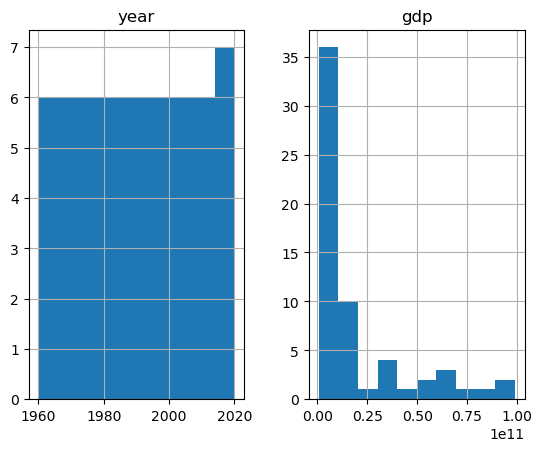

In [15]:
viz = cdf[['year','gdp']]
viz.hist()
plt.show()

Now we have the necessary data for proper analysis and prediction

Now to view Kenyas GDP From year 1960 to 2020 using barplot

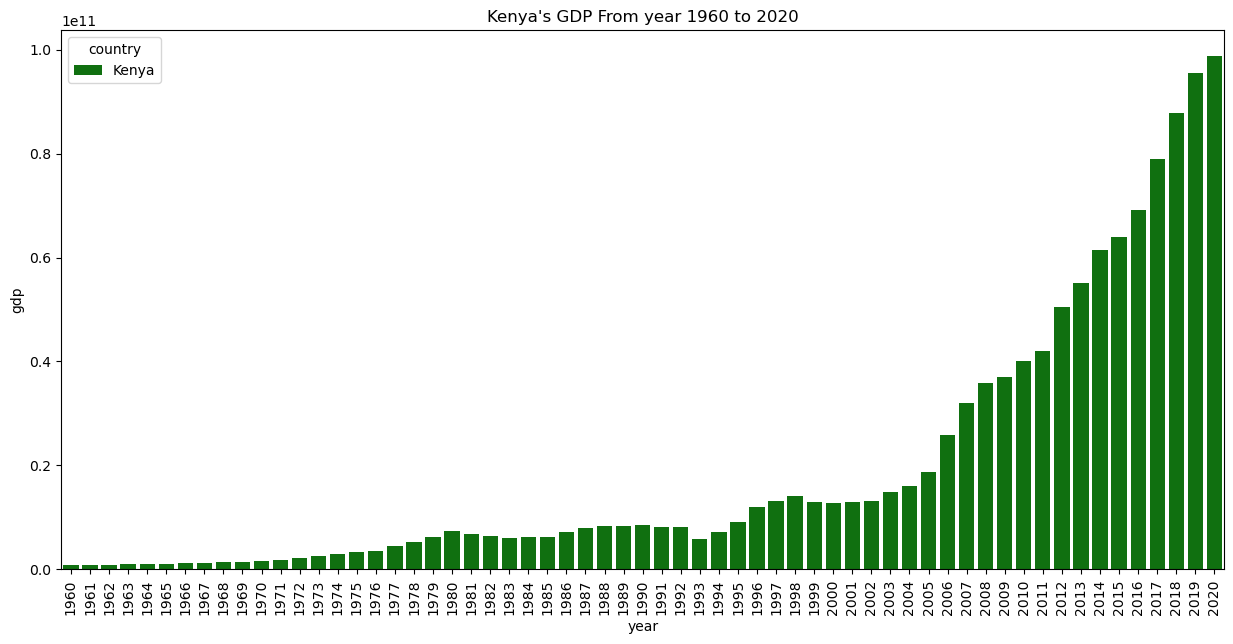

In [16]:
plt.figure(figsize = (15,7))
color = ['green']

sns.barplot(x = 'year',
y = 'gdp',
hue = 'country',
data = Kenya_gdp_data, palette=color)
plt.xticks(rotation = 90)
plt.title("Kenya's GDP From year 1960 to 2020")
plt.show()

Now lets start prediction models

Lets alocate variables data as follows

In [17]:
xx = Kenya_gdp_data.drop(['gdp', 'country'], axis=1)
yy = Kenya_gdp_data['gdp']

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming Kenya_gdp_data is a DataFrame with 'year' and 'gdp' columns
# Example: Replace this with your actual DataFrame
# Kenya_gdp_data = pd.read_csv('path/to/your/data.csv')

# Extract years and GDP values
xx = Kenya_gdp_data['year'].to_numpy().reshape(-1, 1)
yy = Kenya_gdp_data['gdp'].to_numpy().reshape(-1, 1)

# Scale the GDP values
scaler = MinMaxScaler()
yy_scaled = scaler.fit_transform(yy)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 3  # Number of previous steps to use for prediction
X, y = create_sequences(yy_scaled, SEQ_LENGTH)

# Reshape X for LSTM input (samples, timesteps, features)
X = X.reshape((X.shape[0], SEQ_LENGTH, 1))

# Prepare corresponding years for the sequences
xx_seq = xx[SEQ_LENGTH:].flatten()

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
xx_train, xx_test = xx_seq[:train_size], xx_seq[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=1)

# Predict on test data
predicted = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inv = scaler.inverse_transform(y_test)
predicted_inv = scaler.inverse_transform(predicted)



c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0123
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 
Epoch 16/200
2/2 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


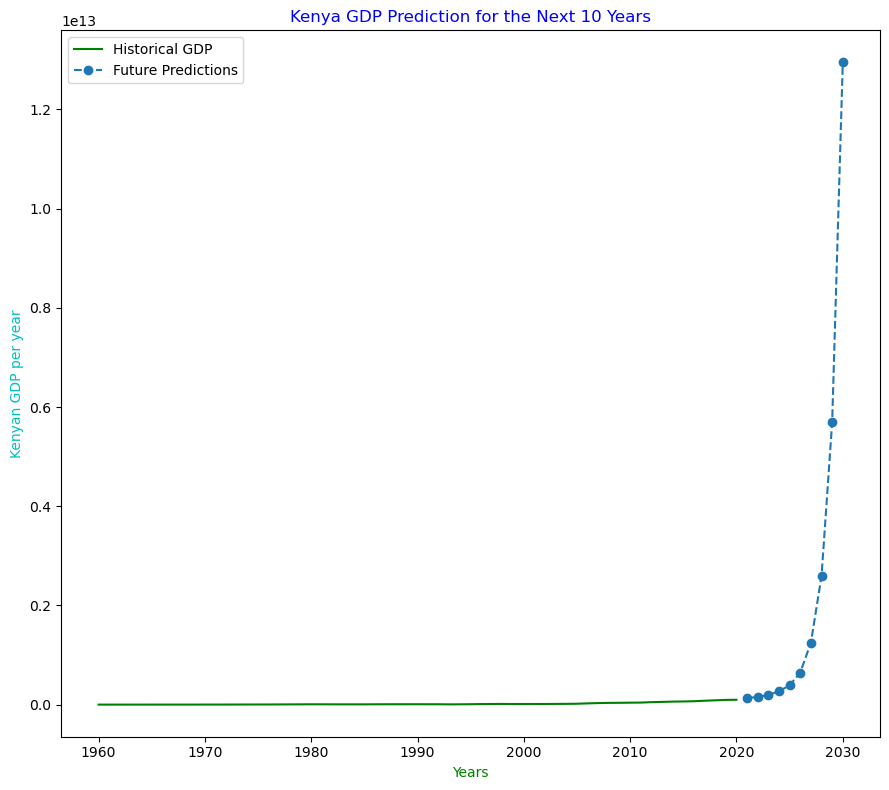

In [25]:

future_input = yy_scaled[-SEQ_LENGTH:]

# List to store future predictions
future_predictions = []

# Predict next 10 years iteratively
for i in range(10):
    # Reshape the input to match the LSTM input shape
    future_input_reshaped = future_input.reshape((1, SEQ_LENGTH, 1))
    
    # Predict the next GDP value
    next_pred = model.predict(future_input_reshaped)
    
    # Append the prediction to the future predictions list
    future_predictions.append(next_pred[0, 0])
    
    # Update the input sequence with the new prediction
    future_input = np.append(future_input[1:], next_pred, axis=0)

# Inverse transform the future predictions to get actual GDP values
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate the years for the future predictions
last_year = xx[-1, 0]
future_years = np.array([last_year + i + 1 for i in range(10)])

# Plot the historical and future predictions
plt.figure(figsize=(9, 8))
plt.plot(xx.flatten(), yy.flatten(), label='Historical GDP', color='green')
plt.plot(future_years, future_predictions_inv.flatten(), label='Future Predictions', color='tab:blue', linestyle='--', marker='o')
plt.legend()
plt.title("Kenya GDP Prediction for the Next 10 Years", color='b')
plt.xlabel("Years", color='g')
plt.ylabel("Kenyan GDP per year", color='c')
plt.tight_layout()
plt.show()

In [26]:
# Print the predicted GDP values year by year
print("Predicted GDP for the Next 10 Years:\n")
for year, gdp in zip(future_years, future_predictions_inv.flatten()):
    print(f"Year: {int(year)} - Predicted GDP: {gdp:.2f}")


Predicted GDP for the Next 10 Years:

Year: 2021 - Predicted GDP: 132544167936.00
Year: 2022 - Predicted GDP: 155885371392.00
Year: 2023 - Predicted GDP: 194007531520.00
Year: 2024 - Predicted GDP: 270417723392.00
Year: 2025 - Predicted GDP: 390045728768.00
Year: 2026 - Predicted GDP: 647196246016.00
Year: 2027 - Predicted GDP: 1248656883712.00
Year: 2028 - Predicted GDP: 2594136915968.00
Year: 2029 - Predicted GDP: 5694919540736.00
Year: 2030 - Predicted GDP: 12946248826880.00
